In [1]:
# 调用库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

Using TensorFlow backend.


In [12]:
# 混淆矩阵函数
def plot_cm(y, yp):

    from sklearn.metrics import confusion_matrix  # 导入混淆矩阵函数
    cm = confusion_matrix(y, yp)  # 混淆矩阵

    plt.figure()
    plt.matshow(cm, cmap=plt.cm.Greens)  # 画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
    plt.colorbar()  # 颜色标签

    for x in range(len(cm)):  # 数据标签
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(
                x, y), horizontalalignment='center', verticalalignment='center')

    plt.ylabel('True label')  # 坐标轴标签
    plt.xlabel('Predicted label')  # 坐标轴标签
    return plt

#ROC曲线图
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    '''
    ____________________________________________________________________________________
    加了保存图片代码，这里路径改一下就行，不需要就注释掉
    ————————————————————————————————————————————————————————————————————————————————————
    '''
    fig = plt.gcf()
    fig.savefig(r'C:\Users\DELL\Desktop\ROC.png', figsize=(15,15),dpi=200)
    plt.show()

In [3]:
# 导入数据
data = pd.read_csv(r'C:\Users\DELL\Desktop\data_new.csv')
data = data.dropna()
data.head()

,L,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,AVG_FLIGHT_COUNT,...,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,Points_Sum,Point_NotFlight,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,result
0,90.200000,0.0,6,31.0,210,239560.0,234188.0,580717,558440.14,26.250,...,259111,74460,39992,114452,619760,50,3352,36640,34,0
1,86.566667,0.0,6,42.0,140,171483.0,167434.0,293678,367777.20,17.500,...,185122,41288,12000,53288,415768,33,0,12000,29,0
2,87.166667,0.0,6,40.0,135,163618.0,164982.0,283712,355966.50,16.875,...,182087,39711,15491,55202,406361,26,3491,12000,20,0
3,68.233333,0.0,5,64.0,23,116350.0,125500.0,281336,306900.88,2.875,...,151210,34890,0,34890,372204,12,0,0,11,1
4,60.533333,0.0,6,48.0,152,124560.0,130702.0,309928,300834.06,19.000,...,145396,42265,22704,64969,338813,39,0,22704,27,0


In [4]:
# 确定特征值和目标值
x = data.iloc[:, 0:28] # 这里根据你的数据量改变
y = data["result"]

In [5]:
#分割数据
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.8)

In [6]:
# 特征工程(标准化)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [7]:
# 神经网络
model = Sequential() # 建立模型
model.add(Dense(units=10, input_dim=28)) # 添加输入层、隐藏层的连接
model.add(Activation('relu')) # 以relu函数为激活函数
model.add(Dense(units=10, input_dim=10)) # 添加隐藏层、二层隐藏层的连接
model.add(Activation('relu')) # 以relu函数为激活函数
model.add(Dense(units=1, input_dim=10)) # 添加二层隐藏层、输出层的连接
model.add(Activation('sigmoid')) # 以sigmoid函数为激活函数

# 第一层是28神经元 下一层是10个神经元，然后套了一层relu函数，然后下一层是10个神经元，又套了一层relu函数，下一层就是只有一个神经元，套了一层sigmoid函数


# 编译模型，损失函数为binary_crossentropy,用adam法求解
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')
model.fit(x_train, y_train, epochs = 1000, batch_size = 100)


model.fit(x_train, y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1000
49303/49303 [==============================] - 0s 10us/step - loss: 0.4553
Epoch 2/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.3386
Epoch 3/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.3187
Epoch 4/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.2995
Epoch 5/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.2709
Epoch 6/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.2462
Epoch 7/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.2289
Epoch 8/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.2155
Epoch 9/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.2034
Epoch 10/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1966
Epoch 11/1000
49303/49303 [======

49303/49303 [==============================] - 1s 10us/step - loss: 0.1350
Epoch 89/1000
49303/49303 [==============================] - 1s 10us/step - loss: 0.1346
Epoch 90/1000
49303/49303 [==============================] - 1s 10us/step - loss: 0.1351
Epoch 91/1000
49303/49303 [==============================] - 1s 12us/step - loss: 0.1330
Epoch 92/1000
49303/49303 [==============================] - 1s 16us/step - loss: 0.1340
Epoch 93/1000
49303/49303 [==============================] - 1s 18us/step - loss: 0.1353
Epoch 94/1000
49303/49303 [==============================] - 1s 16us/step - loss: 0.1341
Epoch 95/1000
49303/49303 [==============================] - 1s 16us/step - loss: 0.1341: 0s - los - ETA: 0s - loss: 
Epoch 96/1000
49303/49303 [==============================] - 1s 15us/step - loss: 0.1342
Epoch 97/1000
49303/49303 [==============================] - 1s 11us/step - loss: 0.1339
Epoch 98/1000
49303/49303 [==============================] - 0s 10us/step - loss: 0.1349
Epoch 

49303/49303 [==============================] - 0s 7us/step - loss: 0.1235
Epoch 272/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1228
Epoch 273/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1236
Epoch 274/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1237
Epoch 275/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1259
Epoch 276/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1240
Epoch 277/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1245
Epoch 278/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1240
Epoch 279/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1242
Epoch 280/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1251
Epoch 281/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1239
Epoch 282/1000
49303/49303 [========

49303/49303 [==============================] - 0s 8us/step - loss: 0.1195
Epoch 456/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1199
Epoch 457/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1206
Epoch 458/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1204
Epoch 459/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1208
Epoch 460/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1202
Epoch 461/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1196
Epoch 462/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1213
Epoch 463/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1210
Epoch 464/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1202
Epoch 465/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1195
Epoch 466/1000
49303/49303 [========

49303/49303 [==============================] - 0s 7us/step - loss: 0.1238
Epoch 640/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1150
Epoch 641/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1157
Epoch 642/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1148
Epoch 643/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1155
Epoch 644/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1155
Epoch 645/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1162
Epoch 646/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1159
Epoch 647/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1158
Epoch 648/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1156
Epoch 649/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1159
Epoch 650/1000
49303/49303 [========

Epoch 731/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1157
Epoch 732/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1147
Epoch 733/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1148
Epoch 734/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1145
Epoch 735/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1140
Epoch 736/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1140
Epoch 737/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1153
Epoch 738/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1156
Epoch 739/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1145
Epoch 740/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1155
Epoch 741/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1145
Epoch 742/1000
49303/

49303/49303 [==============================] - 0s 7us/step - loss: 0.1129
Epoch 915/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1134
Epoch 916/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1137
Epoch 917/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1129
Epoch 918/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1125
Epoch 919/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1142
Epoch 920/1000
49303/49303 [==============================] - 0s 8us/step - loss: 0.1137
Epoch 921/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1141
Epoch 922/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1153
Epoch 923/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1128
Epoch 924/1000
49303/49303 [==============================] - 0s 7us/step - loss: 0.1133
Epoch 925/1000
49303/49303 [========

召回率：               precision    recall  f1-score   support

         未流失       0.96      0.95      0.96      7628
         已流失       0.92      0.94      0.93      4698

    accuracy                           0.95     12326
   macro avg       0.94      0.94      0.94     12326
weighted avg       0.95      0.95      0.95     12326



<Figure size 432x288 with 0 Axes>

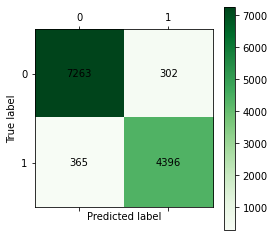

In [15]:
# 混淆矩阵
predict_result_test = model.predict_classes(x_test).reshape(len(x_test)) #给出预测类别（测试集）
print("召回率：", classification_report(y_test, predict_result_test, labels=[0, 1], target_names=["未流失", "已流失"]))
#plot_cm(y_test, predict_result_test).show() #显示混淆矩阵可视化结果 看训练结果正确率
# 保存图片
plot_cm(y_test, predict_result_test).savefig(r'C:\Users\DELL\Desktop\hunxiaojuzhen.png', bbox_inches='tight')

E:\ana\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later


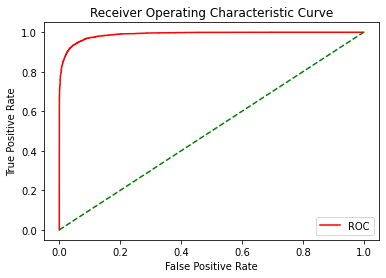

In [13]:
# ROC曲线
prob = model.predict(x_test).reshape(len(x_test))
fper, tper, thresholds = roc_curve(y_test.values, prob)
plot_roc_curve(fper, tper)